In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt = pd.read_csv("/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv")
dt.head(5)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [4]:
dt.dtypes

Unnamed: 0                 int64
ID                         int64
Country of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
ICO Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number of Bags             int64
Bag Weight                object
In-Country Partner        object
Harvest Year              object
Grading Date              object
Owner                     object
Variety                   object
Status                    object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetness                float64
Overall                  float64
Defects   

A uma primeira vista, temos variáveis categóricas e numéricas bem definidas, sendo as variáveis categóricas mais interessantes:
* Country of Origin         object
* Farm Name                 object
* Lot Number                object
* Mill                      object
* ICO Number                object
* Company                   object
* Altitude                  object
* Region                    object
* Producer                  object
* Number of Bags             int64
* Bag Weight                object
* In-Country Partner        object
* Harvest Year              object
* Grading Date              object
* Owner                     object
* Variety                   object
* Status                    object
* Processing Method         object
* Color                     object

At variables of interest we have the
* Category One Defects       int64
* Category Two Defects       int64

wich 

In [5]:
#Verificando valores de Categorias do Tipo 1 : 
dt['Category One Defects'].unique()

array([0, 2, 1, 3, 4, 5])

In [6]:
#Verificando valores de Categorias do Tipo 2 : 
dt['Category Two Defects'].unique()

array([ 3,  0,  2,  1,  5,  4,  9,  7, 12, 11, 16,  8, 10, 13])

In [7]:
# Dummy para avaliar se possui algum defeito ou não para os do tipo um e tipo dois.
dt['one_defect'] = np.where(dt['Category One Defects']>0,1,0) # Se 1 tem defeito do tipo 1
dt['two_defect'] = np.where(dt['Category Two Defects']>0,1,0) # Se 1 tem defeito do tipo 2

In [8]:
# Calculando de percentual de quantos grãos possuem defeito do tipo 1 e do tipo 2
pct_defect_one = dt['one_defect'].mean()*100
pct_defect_two = dt['two_defect'].mean()*100

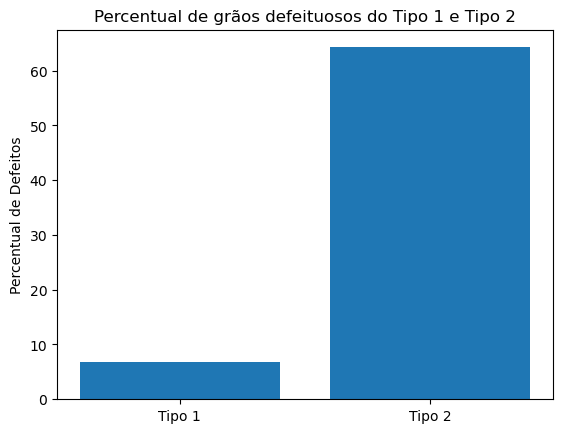

In [9]:
lb = ['Tipo 1', 'Tipo 2']
percentages = [pct_defect_one,pct_defect_two]

plt.bar(lb, percentages)
plt.ylabel('Percentual de Defeitos')
plt.title("Percentual de grãos defeituosos do Tipo 1 e Tipo 2")

plt.show()

Fica claro que os defeitos do tipo 1 são muito mais incomuns que do tipo 2.
Cabe a análise de como estão distribuídos esses defeitos de tipo 2 em termos de quantidade. Ou seja, a maior parte dos grãos defeituosos apresentam quantos defeitos do tipo 2?

Alguns dos defeitos considerados do tipo 2 são:
* 0 - Sem defeitos
* CAFÉ COZIDO : Grão cozinhado além do ponto
* SUBDESENVOLVIDO : Grãos com menores índices de caramelização dos açúcares durante a tora ( reduz sabor do café)
* SUPER DESENVOLVIDO: Oposto do subdesenvolvido, o sabor será de queimado e amargo, com notas de carvão enfumaçadas.
* QUAKERS : Similares aos subdesenvolvidos porém defeituosos devido a problemas não relacionados à torra do café, tornando-os limitados no desenolvimento de açucares e amido.
* QUEIMADOS : Autoexplicativo, grãos que passaram por um processo de torra inadequado com alta temperatura inicial gerando sabores oleosos e enfumaçado.

Mais informações em : https://perfectdailygrind.com/pt/2020/02/13/6-defeitos-comuns-de-torra-e-como-reconhece-los/



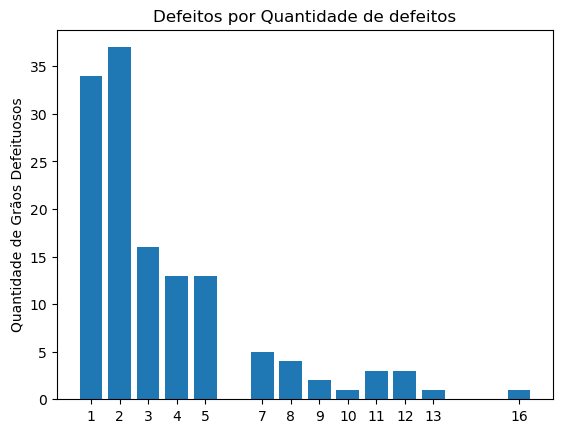

In [13]:
# Agrupando defeitos por quantidade de defeitos do tipo dois.
contagem_defeitos = dt.groupby('Category Two Defects').count()

# Retirando os grãos que não contém defeitos do tipo 2.
contagem_defeitos = contagem_defeitos[contagem_defeitos.index != 0]

# Gráfico de barras da quantidade de grãos que contém defeitos pela quantiade de defeitos encontrados.
plt.bar(contagem_defeitos.index,contagem_defeitos['two_defect'])
plt.title("Defeitos por Quantidade de defeitos")
plt.ylabel('Quantidade de Grãos Defeituosos')
# Set x-axis tick labels as integers
plt.xticks(contagem_defeitos.index.astype(int))

plt.show()

Fica claro que a maior parte dos defeitos está concentrado entre 1 e dois defeitos. Assim, é coerente que, principalmente para defeitos não perceptíveis visualmente, uma baixa quantidade de defeitos não seja filtrada.
Outras perguntas relevantes:
* Qual a maior quantidade de defeitos do tipo 1 e tipo 2 encontrados?
* Qual a média de defeitos do tipo 1 e do tipo 2?
* Quais países apresentam grãos com maior quantidade de defeitos?
* Quais países apresentam grãos com menor quantidade de defeitos?
* Quais fazendas apresentam grãos com menos defeitos do tipo 1 e dois?
* Existe alguma relação do ano de colheita com a quantidade de defeitos?
* Os defeitos apresentam proporcionalidade com o peso da amostra de café apresentada? #Importante para verificar possibilidade de viés de seleção na amostra.


In [21]:
# Calculando maior quantidade de defeitos tipo 1
maior1 = max(dt["Category One Defects"])
print(f'A maior quantidade de defeitos do tipo dois é : {maior1}')

# Calculando maior quantidade de defeitos tipo 2
maior2 = max(dt["Category Two Defects"])
print(f'A maior quantidade de defeitos do tipo dois é : {maior2}')

A maior quantidade de defeitos do tipo dois é : 5
A maior quantidade de defeitos do tipo dois é : 16


In [28]:
# Calculando média da quantidade de defeitos tipo 1
med1 = np.mean(dt["Category One Defects"])
print(f'A média da quantidade de defeitos do tipo dois é : {med1:.2f}')

# Calculando média na quantidade de defeitos tipo 2
med2 = np.mean(dt["Category Two Defects"])
print(f'A média da quantidade de defeitos do tipo dois é : {med2:.2f}')
# Avaliando relatividade entre as médias.
print(f'Ou seja, em média, defeitos do tipo 2 são {med2/med1:.2f} vezes mais recorrentes do que do tipo 1 em nossa amostra.')

A média da quantidade de defeitos do tipo dois é : 0.14
A média da quantidade de defeitos do tipo dois é : 2.25
Ou seja, em média, defeitos do tipo 2 são 16.64 vezes mais recorrentes do que do tipo 1 em nossa amostra.


## Avaliando os grãos defeituosos por país

In [69]:
defeitos_pais = dt.groupby(['Country of Origin'])['one_defect'].mean()
defeitos_pais = defeitos_pais.to_frame() # Converter em DataFrame

defeitos_pais

,one_defect
Country of Origin,
Brazil,0.100000
Colombia,0.105263
Costa Rica,0.125000
El Salvador,0.000000
Ethiopia,0.090909
Guatemala,0.000000
Honduras,0.000000
Indonesia,0.000000
Kenya,0.000000


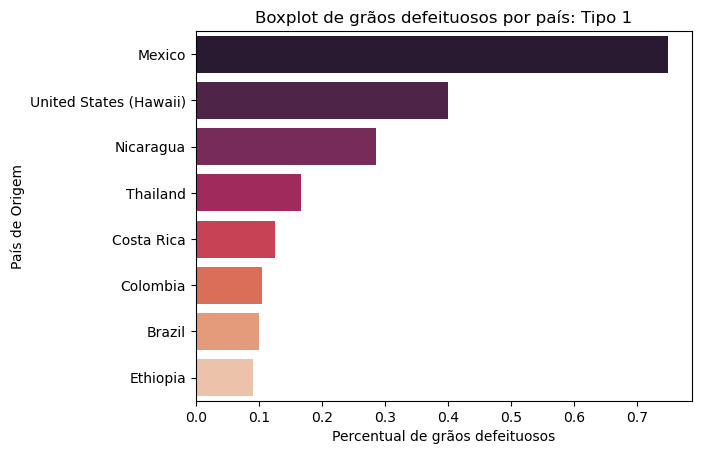

In [77]:
#Avaliando distribuição da quantidade de erros por país. 
# Escolhi avaliar via boxplot
# agrupando por país a quantidade de defeitos
defeitos_pais = dt.groupby(['Country of Origin'])['one_defect'].mean()
defeitos_pais = defeitos_pais.to_frame() # Converter em DataFrame

#Removendo países sem grãos com defeitos do tipo 1
defeitos_pais = defeitos_pais[defeitos_pais['one_defect']!=0]

#Ordenando do país com mais defeitos para o país com menos defeitos do tipo 1
defeitos_pais = defeitos_pais.sort_values(by='one_defect', ascending = False)
# Criando Boxplot por País de Origem
sns.barplot(x = defeitos_pais['one_defect'], y =defeitos_pais.index , data = defeitos_pais, orient = 'h',palette='rocket' )

# Adicionar título ao gráfico
plt.title('Boxplot de grãos defeituosos por país: Tipo 1')
plt.ylabel('País de Origem')
plt.xlabel('Percentual de grãos defeituosos')
# Exibir gráfico
plt.show()




In [70]:
# Países que não apresentaram defeitos do tipo 1 em são grãos:
print(defeitos_pais[defeitos_pais['one_defect']==0])

                              one_defect
Country of Origin                       
El Salvador                          0.0
Guatemala                            0.0
Honduras                             0.0
Indonesia                            0.0
Kenya                                0.0
Laos                                 0.0
Madagascar                           0.0
Myanmar                              0.0
Panama                               0.0
Peru                                 0.0
Taiwan                               0.0
Tanzania, United Republic Of         0.0
Uganda                               0.0
Vietnam                              0.0


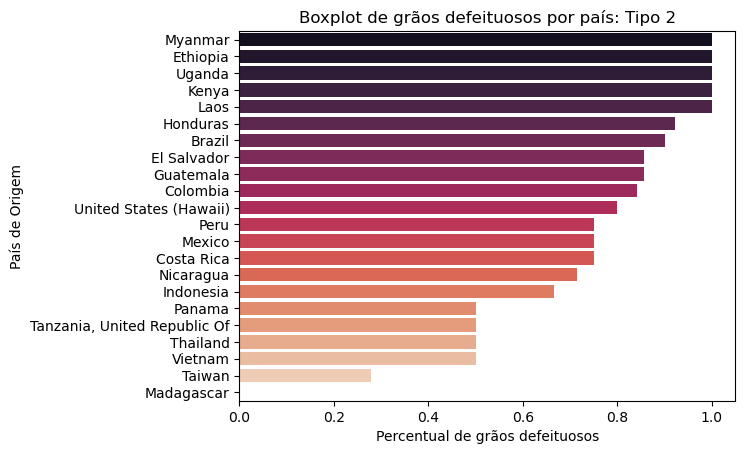

In [78]:
#Avaliando distribuição da quantidade de erros por país. 
# Escolhi avaliar via boxplot
# agrupando por país a quantidade de defeitos
defeitos2_pais = dt.groupby(['Country of Origin'])['two_defect'].mean()
defeitos2_pais = defeitos2_pais.to_frame() # Converter em DataFrame

#Removendo países sem grãos com defeitos do tipo 1
defeitos_pais2 = defeitos2_pais[defeitos2_pais['two_defect']!=0]

#Ordenando do país com mais defeitos para o país com menos defeitos do tipo 1
defeitos2_pais = defeitos2_pais.sort_values(by='two_defect', ascending = False)
# Criando Boxplot por País de Origem
sns.barplot(x = defeitos2_pais['two_defect'], y =defeitos2_pais.index , data = defeitos2_pais, orient = 'h',palette='rocket' )

# Adicionar título ao gráfico
plt.title('Boxplot de grãos defeituosos por país: Tipo 2')
plt.ylabel('País de Origem')
plt.xlabel('Percentual de grãos defeituosos')
# Exibir gráfico
plt.show()

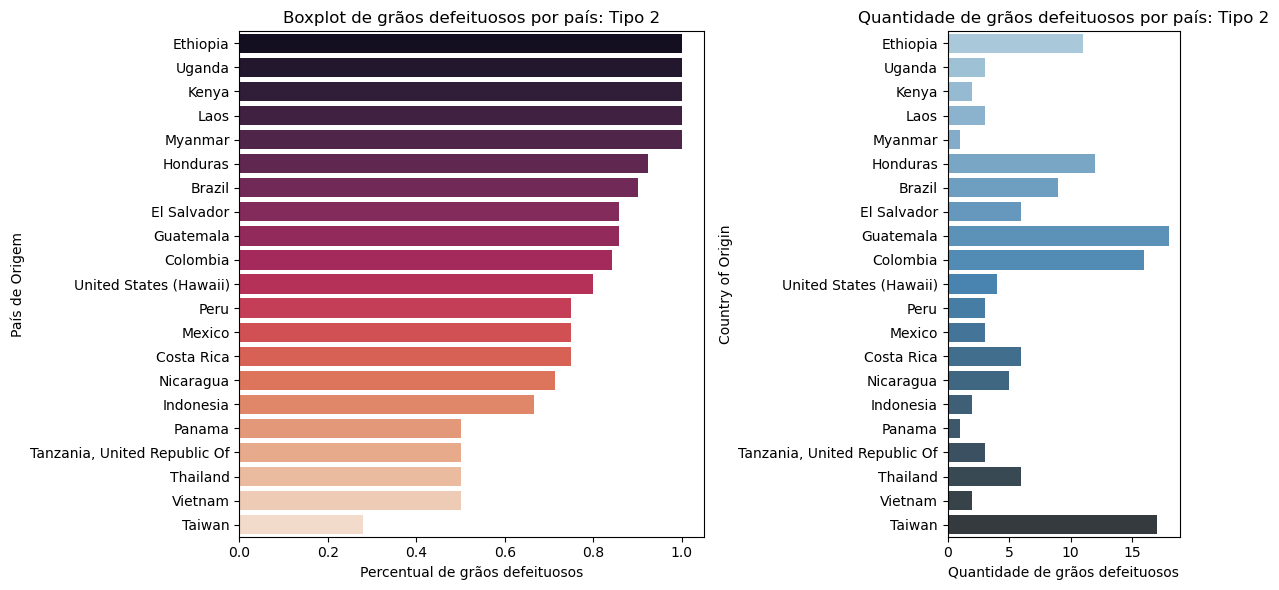

In [90]:
# Agrupando por país a quantidade de defeitos do tipo 2
defeitos2_pais = dt.groupby(['Country of Origin'])['two_defect'].mean()
defeitos2_pais = defeitos2_pais.to_frame() # Converter em DataFrame

# Agrupando por país a quantidade total de defeitos do tipo 2
defeitos2_total = dt.groupby(['Country of Origin'])['two_defect'].sum()
defeitos2_total = defeitos2_total.to_frame()

# Removendo países sem grãos com defeitos do tipo 2
defeitos2_pais = defeitos2_pais[defeitos2_pais['two_defect'] != 0]

# Ordenando do país com mais defeitos para o país com menos defeitos do tipo 2
defeitos2_pais = defeitos2_pais.sort_values(by='two_defect', ascending=False)

# Reordenando o DataFrame defeitos2_total de acordo com a ordem dos países em defeitos2_pais
defeitos2_total = defeitos2_total.reindex(defeitos2_pais.index)

# Criando figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

# Plotando o primeiro gráfico com a porcentagem de defeitos do tipo 2
sns.barplot(x=defeitos2_pais['two_defect'], y=defeitos2_pais.index, data=defeitos2_pais, orient='h', palette='rocket', ax=ax1)



# Configurando título e rótulos do primeiro gráfico
ax1.set_title('Boxplot de grãos defeituosos por país: Tipo 2')
ax1.set_ylabel('País de Origem')
ax1.set_xlabel('Percentual de grãos defeituosos')

# Plotando o segundo gráfico com a quantidade total de defeitos do tipo 2
sns.barplot(x=defeitos2_total['two_defect'], y=defeitos2_total.index, data=defeitos2_total, orient='h', palette='Blues_d', ax=ax2)

# Configurando título e rótulos do segundo gráfico
ax2.set_title('Quantidade de grãos defeituosos por país: Tipo 2')
ax2.set_xlabel('Quantidade de grãos defeituosos')

# Ajustando espaçamento entre subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [91]:
dt['Country of Origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand', 'Brazil',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Indonesia', 'Peru',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

Aqui mostra-se claro que é muito difícil identificar atualmente os defeitos do tipo 2. Os cinco primeiros países : Etiópia, Uganda, Quenia e Laos possuem 100% dos seus grãos exibindo defeitos do tipo 2. Até o Brasil, país com histórico de exportação de café, possui altos índices de erro do tipo 2 acima de 80%. De modo geral, é interessante a relação de que todos os países que apresentam erros do tipo 2 e 1 nenhum é considerado um país desenvolvido.
Porém, não significa que a produção de café de qualidade é restrita a países desenvolvidos e sim que eles não fazem parte deste mercado. A única exceção é o Hawaii, fazendo parte dos EUA, porém é uma situação não representativa da economia americana dada as diferenças na economia deste estado e o restante do país.
Outro ponto interessante apresentado nos dados é a situação de Taiwan, ainda que possua uma das maiores quantidades de grãos defeituosos, possui o menor percentual em relação ao total de grãos registrados. Isso significa que possuem majoritariamente grãos apropriados, sem nenhum defeito do tipo 1 e um baixo percentual de defeitos do tipo 2. Pode-se adequar a Thailandia nesta explicação porém em menor grau de exportação e percentual de erros, ficando bem atras de Taiwan. Vale salientar que ambos são países são asiáticos porém não existe nenhuma relação a respeito disso por dois pontos. O primeiro é que Taiwan é uma ilha, não compartilhando da mesma geografia em termos de solo e condições a Tailandia. Além disso, países como Laos e Myanmar possuem mais similaridades geográficas ( estão mais perto da Tailandia) e ainda sim possuem péssimos índices.

A partir dessa visão relativista, as situações de Guatemala, Honduras, Colombia, Etiópia e Brasil são similares de países que possuem muitos grãos registrados e a maior parte deles com defeitos do tipo 2.

Por fim, algo muito interessante é a péssima situação do México que consegue ter mais de 70% dos grãos com defeitos do tipo 1 e quase 80% do tipo 2. Ou seja, registram poucos grãos porém quase todos de péssima qualidade.

## Avaliando quais Fazendas apresentam maior quantidade de grãos defeituosos.

In [113]:
# Agrupando por país a quantidade de defeitos do tipo 2
defeitos1_farm = dt.groupby(['Farm Name'])['one_defect'].sum()
defeitos1_farm = defeitos1_farm.to_frame() # Converter em DataFrame
# Agrupando por país a quantidade de defeitos do tipo 2
defeitos2_farm = dt.groupby(['Farm Name'])['two_defect'].sum()
defeitos2_farm = defeitos2_farm.to_frame() # Converter em DataFrame


In [119]:
# Top 5 Fazendas com defeito do tipo 1
defeitos1_farm = defeitos1_farm.sort_values(by = "one_defect", ascending = False).head(5)
# Top 5 Fazendas com Defeito do tipo 2
defeitos2_farm = defeitos2_farm.sort_values(by = "two_defect", ascending = False).head(5)

In [117]:
defeitos1_farm_top5

,one_defect
Farm Name,
Doi Tung Development Project,2
Finca San José,1
Finca Custepec,1
Finca Las Dos Marias,1
Manny's Farm,1


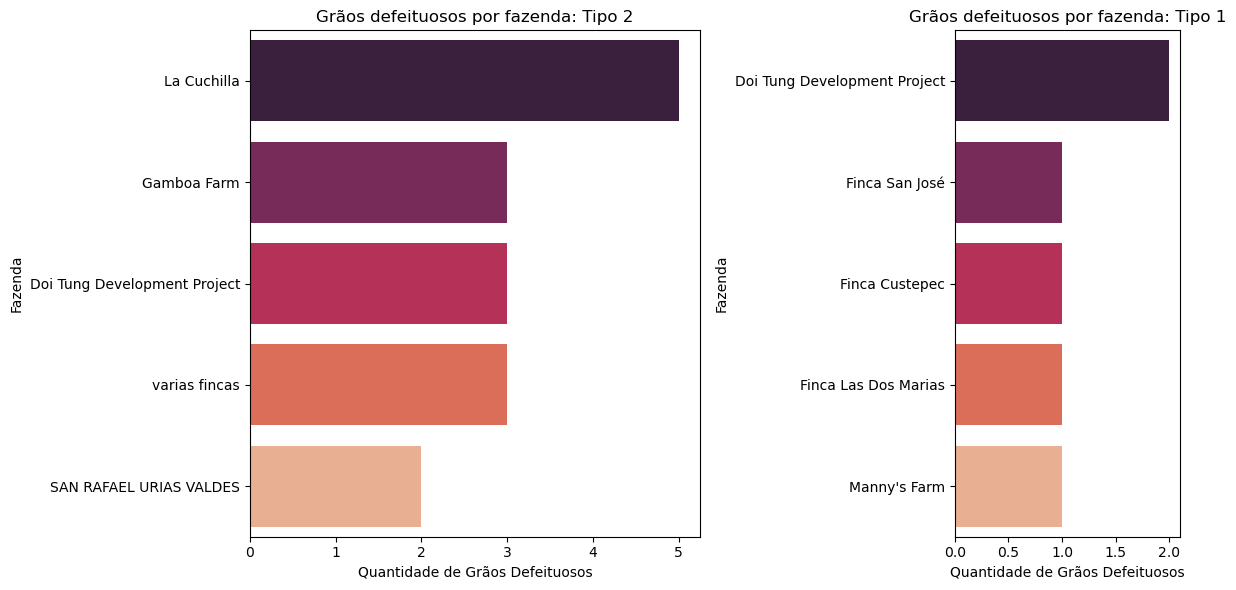

In [132]:
fig,(ax1, ax2) =  plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]}) 

sns.barplot(x = defeitos2_farm_top5['two_defect'], y = defeitos2_farm_top5.index,orient = 'h', data = defeitos2_farm_top5, palette = "rocket", ax = ax1)
# Configurando título e rótulos do primeiro gráfico
ax1.set_title('Grãos defeituosos por fazenda: Tipo 2')
ax1.set_ylabel('Fazenda')
ax1.set_xlabel('Quantidade de Grãos Defeituosos')

sns.barplot(x = defeitos1_farm_top5['one_defect'], y = defeitos1_farm_top5.index,orient = 'h', data = defeitos1_farm_top5, palette = "rocket",ax = ax2)
# Configurando título e rótulos do segundo gráfico
ax2.set_title('Grãos defeituosos por fazenda: Tipo 1')
ax2.set_ylabel('Fazenda')
ax2.set_xlabel('Quantidade de Grãos Defeituosos')
plt.tight_layout()
plt.show()

Apenas DoiTung Development Project está em ambos top 5. Pode-se dizer que é uma fazenda não muito boa.
Apeasr disso, os defeitos do tipo 2 são majoritariamente devido ao processo de Torra, não sendo completa responsabilidade da fazenda. Assim, vale analisar tanto os métodos de processamento dos grãos com defeitos.

## Avaliando Procedimentos e Laboratório dos grãos com mais defeito.

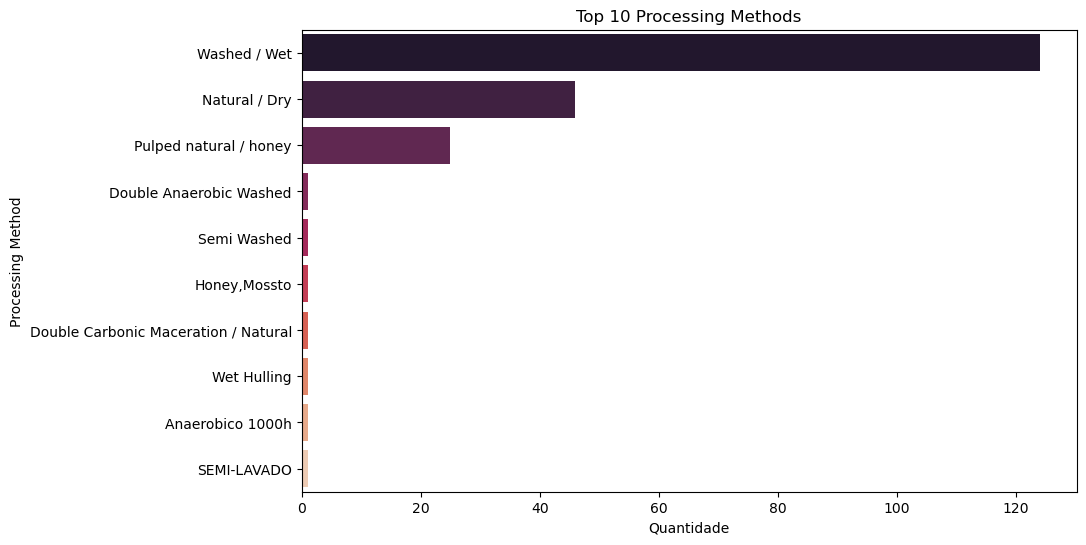

In [134]:
# Contando a frequência dos valores da coluna "Processing method"
processing_method_counts = dt['Processing Method'].value_counts()

# Selecionando os top 10 valores mais frequentes
top10_processing_methods = processing_method_counts.head(10)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_processing_methods.values, y=top10_processing_methods.index, palette='rocket')

# Configurando os rótulos do eixo x e y
plt.xlabel('Quantidade')
plt.ylabel('Processing Method')

# Configurando o título do gráfico
plt.title('Top 10 Processing Methods')

# Exibindo o gráfico
plt.show()

Vemos que o procedimento mais utilizado é o de lavagem/ Secagem, vamos ver qual a relação disso com a quantidade de grãos defeituosos

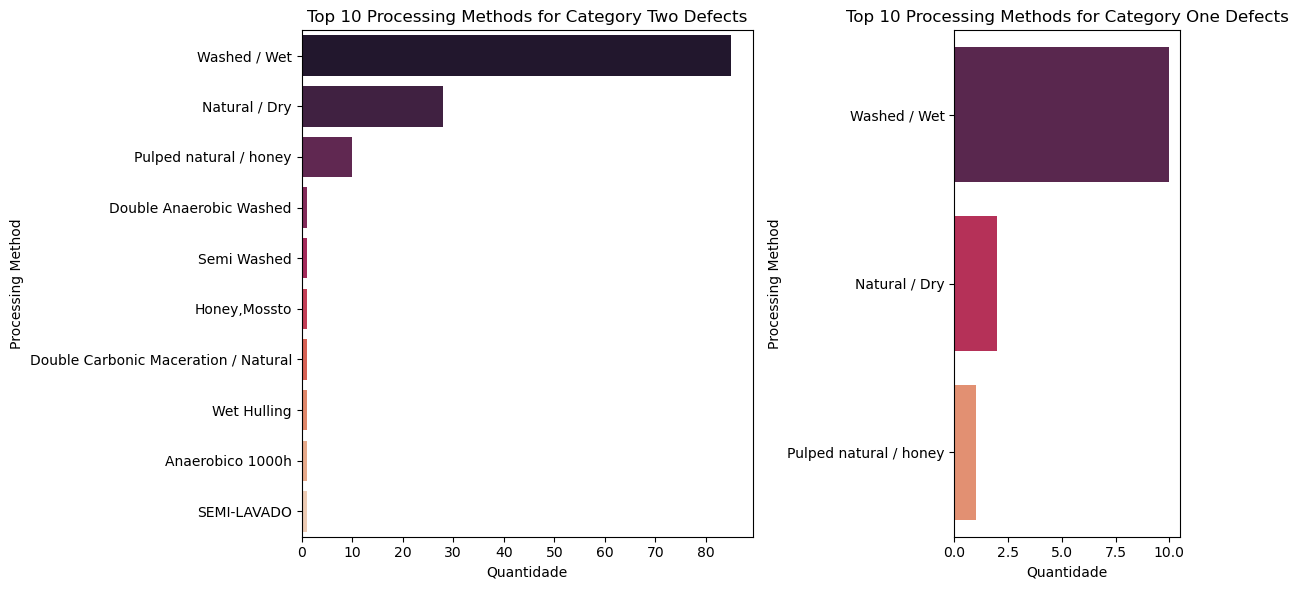

In [145]:
fig,(ax1, ax2) =  plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]}) 
# Contando a frequência dos valores da coluna "Processing Method" para casos de defeitos do tipo 2
processing_method_counts2 = dt[dt['two_defect'] == 1]['Processing Method'].value_counts()

# Selecionando os top 10 valores mais frequentes
top10_processing_methods2 = processing_method_counts2.head(10)

# Criando o gráfico de barras

sns.barplot(x=top10_processing_methods2.values, y=top10_processing_methods2.index, palette='rocket',ax = ax1)

# Configurando os rótulos do eixo x e y
ax1.set_xlabel('Quantidade')
ax1.set_ylabel('Processing Method')

# Configurando o título do gráfico
ax1.set_title('Top 10 Processing Methods for Category Two Defects')

# Contando a frequência dos valores da coluna "Processing Method" para casos de defeitos do tipo 2
processing_method_counts1 = dt[dt['one_defect'] == 1]['Processing Method'].value_counts()

# Selecionando os top 10 valores mais frequentes
top10_processing_methods1 = processing_method_counts1.head(10)

# Criando o gráfico de barras

sns.barplot(x=top10_processing_methods1.values, y=top10_processing_methods1.index, palette='rocket',ax=ax2)

# Configurando os rótulos do eixo x e y
ax2.set_xlabel('Quantidade')
ax2.set_ylabel('Processing Method')

# Configurando o título do gráfico
ax2.set_title('Top 10 Processing Methods for Category One Defects')

# Ajustando layout
plt.tight_layout()
# Exibindo o gráfico
plt.show()


Ambos os defeitos compartilham, obviamente, de grande incidência do procedimento 'Washed/Wet" se mostrando pouco adequados para a contenção dos erros. Apesar disso, é natural pensar que a escolha por esse método seja devido ao baixo custo operacional para implementa-lo. Apesar disso, nenhum dos procedimentos apresentados no gráfico a direita sobre os defeitos do tipo 1 por procedimento impactam nos defeitos do tipo 2.

In [152]:
def plot_top_10_qtd(df, group_column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

    # Contando a frequência dos valores da coluna "Processing Method" para casos de defeitos do tipo 2
    processing_method_counts2 = df[df['two_defect'] == 1][group_column].value_counts()

    # Selecionando os top 10 valores mais frequentes
    top10_processing_methods2 = processing_method_counts2.head(10)

    # Criando o gráfico de barras
    sns.barplot(x=top10_processing_methods2.values, y=top10_processing_methods2.index, palette='rocket', ax=ax1)

    # Configurando os rótulos do eixo x e y
    ax1.set_xlabel('Quantidade')
    ax1.set_ylabel(group_column)

    # Configurando o título do gráfico
    ax1.set_title('Top 10 {} for Category Two Defects'.format(group_column))

    # Contando a frequência dos valores da coluna "Processing Method" para casos de defeitos do tipo 1
    processing_method_counts1 = df[df['one_defect'] == 1][group_column].value_counts()

    # Selecionando os top 10 valores mais frequentes
    top10_processing_methods1 = processing_method_counts1.head(10)

    # Criando o gráfico de barras
    sns.barplot(x=top10_processing_methods1.values, y=top10_processing_methods1.index, palette='rocket', ax=ax2)

    # Configurando os rótulos do eixo x e y
    ax2.set_xlabel('Quantidade')
    ax2.set_ylabel(group_column)

    # Configurando o título do gráfico
    ax2.set_title('Top 10 {} for Category One Defects'.format(group_column))

    # Ajustando layout
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()

In [159]:
def plot_mean_defects(df, group_column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

    # Calculando a média da coluna "one_defect" por categoria
    mean_defects1 = df.groupby(group_column)['one_defect'].mean().sort_values(ascending=False)
    mean_defects1 = mean_defects1.head(10)

    # Criando o gráfico de barras para a média de "one_defect"
    sns.barplot(x=mean_defects1.values, y=mean_defects1.index, palette='rocket', ax=ax1)

    # Configurando os rótulos do eixo x e y
    ax1.set_xlabel('Média')
    ax1.set_ylabel(group_column)

    # Configurando o título do gráfico
    ax1.set_title('Média de "one_defect" por {}'.format(group_column))

    # Calculando a média da coluna "two_defect" por categoria
    mean_defects2 = df.groupby(group_column)['two_defect'].mean().sort_values(ascending=False)
    mean_defects2 = mean_defects2.head(10)

    # Criando o gráfico de barras para a média de "two_defect"
    sns.barplot(x=mean_defects2.values, y=mean_defects2.index, palette='rocket', ax=ax2)

    # Configurando os rótulos do eixo x e y
    ax2.set_xlabel('Média')
    ax2.set_ylabel(group_column)

    # Configurando o título do gráfico
    ax2.set_title('Média de "two_defect" por {}'.format(group_column))

    # Ajustando layout
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()

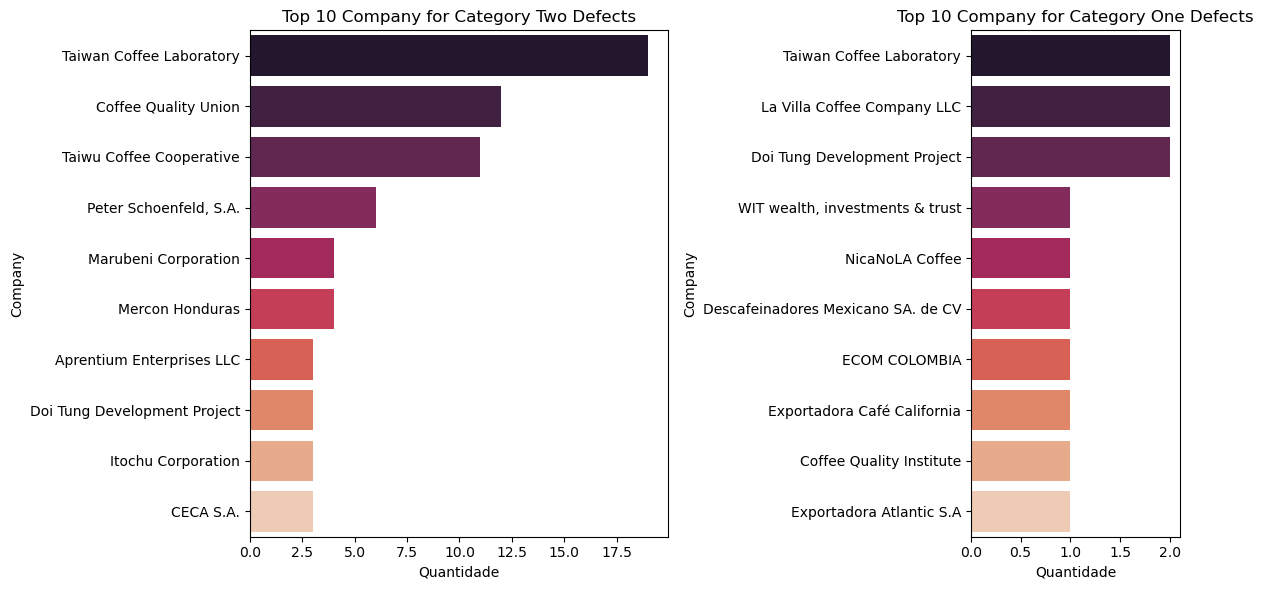

In [161]:
plot_top_10_qtd(dt,"Company")

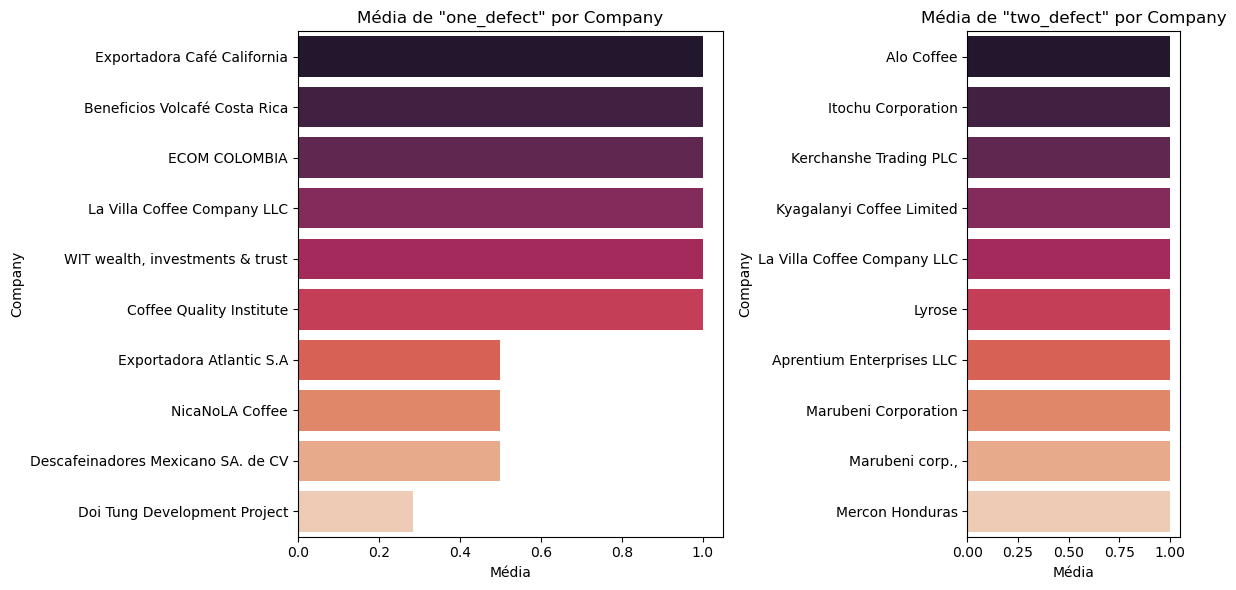

In [160]:
# Plotando top 10 laboratórios com maiores defeitos do tipo 1 e 2
plot_mean_defects(dt,"Company")

Esses gráficos mostram coisas interessantes, ainda que a Taiwan Coffe Laboratory seja a companhia com maior quantidade de erros do tipo 1 e 2, ela nem chega ao top 10 quando fazemos a relação pela quantidade total de grãos registrados. Principalmente em relação a média do top 10 de companhias para defeitos do tipo 2 onde 100% dos grãos dessas companhias apresentam defeitos. Com destaque especial para a 'La Villa Coffee Company LLC" a qual todos os grãos possuem defeitos do tipo 1 e dois.

# Análise dos índices dos cafés e suas notas avaliativas

Relembrando principais características numéricas dos grãos:
* Avaliações sensoriais (pontuações de qualidade do café)
* Aroma: Refere-se ao cheiro ou fragrância do café.
* Sabor: O sabor do café é avaliado com base no gosto, incluindo qualquer doçura, amargor, acidez e outras notas de sabor.
* Retrogosto: Refere-se ao gosto que permanece na boca após engolir o café.
* Acidez: A acidez no café se refere ao brilho ou vivacidade do sabor.
* Corpo: O corpo do café se refere à espessura ou viscosidade do café na boca.
* Equilíbrio: O equilíbrio se refere a quão bem os diferentes componentes de sabor do café funcionam juntos.
* Uniformidade: Uniformidade se refere à consistência do café de xícara para xícara.
* Xícara Limpa: Uma xícara limpa se refere a um café que está livre de qualquer sabor estranho ou defeitos, como acidez, mofo ou ranço.
* Doçura: Pode ser descrita como caramelo, frutada ou floral, e é uma qualidade desejável no café.

Removi as colunas 'Unnamed: 0', 'ID' pois não possuem relação com a nota.

In [187]:
# Não estou vendo vantagem em considerar as colunas abaixo.
dt[['Clean Cup','Sweetness','Defects']].tail(10)

,Clean Cup,Sweetness,Defects
197,10.0,10.0,0.0
198,10.0,10.0,0.0
199,10.0,10.0,0.0
200,10.0,10.0,0.0
201,10.0,10.0,0.0
202,10.0,10.0,0.0
203,10.0,10.0,0.0
204,10.0,10.0,0.0
205,10.0,10.0,0.0
206,10.0,10.0,0.0


In [193]:
# Separando colunas numéricas do dataframe
num_list = dt.select_dtypes(exclude=["object"]).columns.tolist()

# Removendo elementos da lista
num_list = [col for col in num_list if col not in ['Unnamed: 0', 'ID','Category One Defects','Category Two Defects', 'Clean Cup','Sweetness','Defects']]

In [194]:
num_list

['Number of Bags',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Overall',
 'Total Cup Points',
 'Moisture Percentage',
 'Quakers',
 'one_defect',
 'two_defect']

In [195]:

coffeeQualityDF = dt[num_list]
coffeeQualityDF.head()

,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Quakers,one_defect,two_defect
0,1,8.58,8.50,8.42,8.58,8.25,8.42,10.0,8.58,89.33,11.8,0,0,1
1,1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,8.50,87.58,10.5,0,0,0
2,19,8.33,8.42,8.08,8.17,7.92,8.17,10.0,8.33,87.42,10.4,0,0,1
3,1,8.08,8.17,8.17,8.25,8.17,8.08,10.0,8.25,87.17,11.8,0,0,0
4,2,8.33,8.33,8.08,8.25,7.92,7.92,10.0,8.25,87.08,11.6,2,0,1


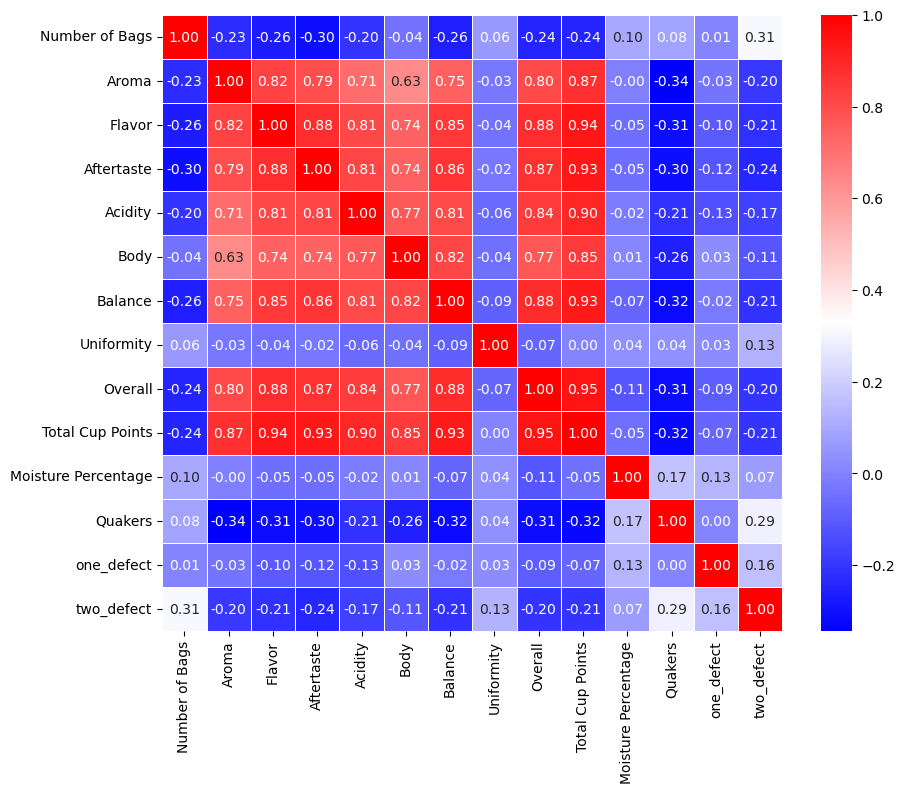

In [196]:
plt.figure(figsize=(10, 8))
sns.heatmap(coffeeQualityDF.corr(), annot=True, linewidth=0.5, fmt='.2f', cmap='bwr')

plt.show();

Correlação altíssima entre as características preditivas e sua respectiva nota. Com exceção de Quakers, que possui relação negativa por ser um defeito do grão, Moisture percentage e NUmber of bags há espaço para seleção e criação de novas features para um modelo preditivo da nota total do grão.

* Vale salientar que em relação aos defeitos de tipo 1, a correlação é positiva para Moisture percentage, Uniformity,Body e Number of bags. Sendo este último intuitivo pois é esperado de uma amostragem com mais grãos encontrar mais defeitos.
* Em relação aos defeitos do tipo 2, há a relação esperada positiva com a variável Quakers pois é um defeito geralmente gerado no proceso de torra. Além disso, possui correlação positiva com Moisture percentage, Uniformity, e Number of bags. Em especial para Number of bags que possui o maior valor absoluto do coeficiente de pearson.

# Conclusão

Ainda há muito o que se explorar a respeito do dataset apresentado. Apesar disso, os aspectos relacionais das variáveis categóricas em relação a defeitos do tipo 1 e 2 com a região onde os grão são produzidos e processados, assim como os métodos utilizados para processamento dos grãos tem impacto considerável em relação à qualidade do grão.
É um pouco assustador a quantidade de grãos defeituosos produzidos e comercializados, assim como a reflexão de desigualdade ao imaginar para qual público esses grãos de péssima qualidade são produzidos. É coerente imaginar que os melhores grãos, com pouco ou nenhum defeito do tipo 1 ou 2 vão para países com renda média elevada enquanto os grãos de péssima qualidade como os produzidos pela La Villa Coffee Company LLC vão para pessoas pobres.

Certo grau de diferenciação é esperado pela própria dinâmica econômica porém a falta de padronização mínima é surpreendente. Além de outras questões como a similaridade no grau de desenvolvimento econômico dos produtores analisados.

Ainda, é interessante o fato de que a maioria dos problemas gerados nos grãos estão relacionados a características não perceptíveis visualmente, o que abre espaço para a modelagem preditiva identificar, antes dos investimentos em novas produções, quais as técnicas de processamento e plantio que poderiam reduzir a quantidade de defeitos e melhorar a qualidade dos grãos trazendo ganhos econômicos para a população mundial e, principalmente, os amantes de café.